In [7]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")

In [8]:
# importing datasets
restaurant = pd.read_csv('sample_restaurant.csv')
restaurant

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,126141,9XotjNYdPzWCokrVMRo4Mg,The Great Canadian Bagel,"120 Wye Road, Unit 101",Sherwood Park,AB,T8A 6P2,53.512479,-113.327738,4.0,9,1,"{'BikeParking': 'True', 'OutdoorSeating': 'Fal...","Breakfast & Brunch, Sandwiches, Bagels, Coffee...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
1,8518,Y92Nc9GhuXWvIABqNtSWGA,Tavern 52,329 Kennett Pike,Mendenhall,PA,19357,39.853403,-75.640789,3.5,21,1,"{'RestaurantsReservations': 'True', 'WiFi': ""u...","Breakfast & Brunch, Restaurants, American (Tra...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
2,11669,b5byt9ewnM1U57ygWTTV2g,Crab Du Jour - Delran,4000 US-130,Delran,NJ,08075,40.011577,-74.961777,3.0,25,1,"{'Alcohol': ""u'full_bar'"", 'Caters': 'True', '...","Live/Raw Food, Cajun/Creole, Seafood, Restaurants","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
3,116916,4jICs7no7322VjY4hqHVAg,La Cocinita Cubana,113 Central Dr,Brandon,FL,33510,27.939235,-82.292208,4.5,33,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Spanish, Cuban, Restaurants","{'Monday': '7:0-15:30', 'Tuesday': '7:0-15:30'..."
4,66207,pWDE_rueENu_f5HKA_AsWw,Dune Coffee Roasters - Storke,250 A Storke Rd,Goleta,CA,93117,34.429540,-119.869271,4.0,159,1,"{'NoiseLevel': ""u'average'"", 'Alcohol': ""'none...","Food, Restaurants, Cafes, Coffee Roasteries, C...","{'Monday': '6:30-16:0', 'Tuesday': '6:30-16:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,141107,guwb1zuNEMtJVproo0ntFw,La Boca,870 Tchoupitoulas St,New Orleans,LA,70130,29.943455,-90.067341,4.0,420,1,"{'RestaurantsReservations': 'True', 'WiFi': ""u...","Argentine, Latin American, Steakhouses, Desser...","{'Tuesday': '17:30-22:0', 'Wednesday': '17:30-..."
39996,66695,-78Va3llKcPbL6SW4is8lw,Mungo's Italian Eatery,100 East Main St,Collinsville,IL,62234,38.669906,-89.985827,4.0,124,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Seafood, Steakhouses, Italian, Salad, Restaurants","{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'..."
39997,101198,2pj5byDMoMDu-d0bTu2Sew,Pip,10403 83 Ave NW,Edmonton,AB,T6E 2C7,53.518958,-113.497891,4.0,117,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Comfort Food, Food, Wine Bars, Breakfast & Bru...","{'Monday': '9:0-23:0', 'Tuesday': '9:0-23:0', ..."
39998,124342,RKRy17pwMJAbehSkZglwjw,Jia's Wok,477 E Plumb Ln,Reno,NV,89502,39.506363,-119.797213,3.0,35,1,"{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou...","Chinese, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."


[Text(0, 0, '185'),
 Text(0, 0, '1119'),
 Text(0, 0, '2249'),
 Text(0, 0, '3705'),
 Text(0, 0, '5879'),
 Text(0, 0, '9005'),
 Text(0, 0, '10323'),
 Text(0, 0, '6363'),
 Text(0, 0, '1172')]

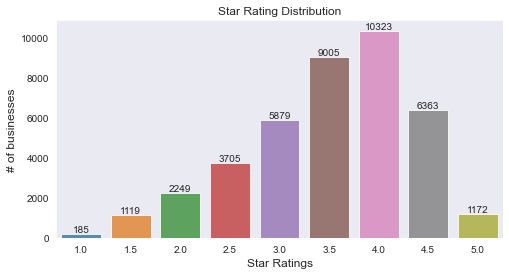

In [9]:
# rating distribution
stars = restaurant['stars'].value_counts()
stars = stars.sort_index()

# plot
plt.figure(figsize=(8,4))
ax = sns.barplot(stars.index, stars.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel("# of businesses", fontsize=12)
plt.xlabel('Star Ratings', fontsize=12)
ax.bar_label(ax.containers[0], label_type='edge')



[Text(0, 0, '40000'),
 Text(0, 0, '11772'),
 Text(0, 0, '6713'),
 Text(0, 0, '6541'),
 Text(0, 0, '6414'),
 Text(0, 0, '6265'),
 Text(0, 0, '5437'),
 Text(0, 0, '4925'),
 Text(0, 0, '4751'),
 Text(0, 0, '4663'),
 Text(0, 0, '4316'),
 Text(0, 0, '3614'),
 Text(0, 0, '3463'),
 Text(0, 0, '3057'),
 Text(0, 0, '2729'),
 Text(0, 0, '2405'),
 Text(0, 0, '2364'),
 Text(0, 0, '2319'),
 Text(0, 0, '2251'),
 Text(0, 0, '2080')]

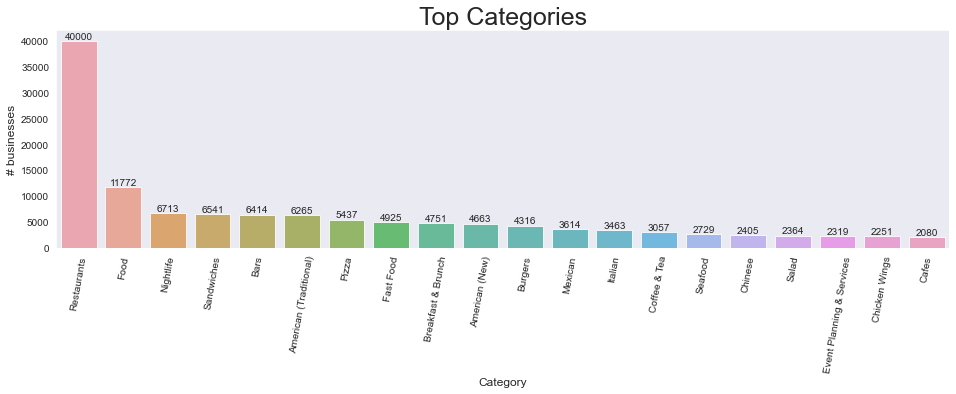

In [25]:
# top business categories
categories = pd.Series(restaurant['categories']).str.get_dummies(', ')
x = categories.sum()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]
# print(x)

plt.figure(figsize=(16, 4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Top Categories", fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)
ax.bar_label(ax.containers[0], label_type='edge')

[Text(0, 0, '4449'),
 Text(0, 0, '2305'),
 Text(0, 0, '2177'),
 Text(0, 0, '1939'),
 Text(0, 0, '1907'),
 Text(0, 0, '1735'),
 Text(0, 0, '1647'),
 Text(0, 0, '1346'),
 Text(0, 0, '973'),
 Text(0, 0, '657'),
 Text(0, 0, '596'),
 Text(0, 0, '516'),
 Text(0, 0, '466'),
 Text(0, 0, '417'),
 Text(0, 0, '403'),
 Text(0, 0, '384'),
 Text(0, 0, '343'),
 Text(0, 0, '310'),
 Text(0, 0, '260'),
 Text(0, 0, '244')]

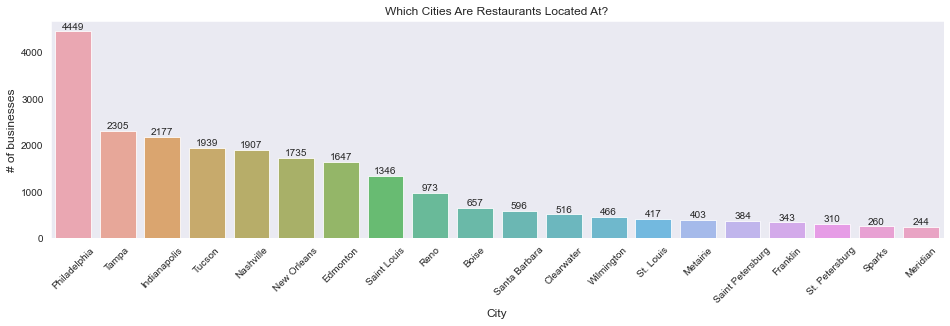

In [26]:
# where are the reviews from?
city = restaurant['city'].value_counts()
city = city.sort_values(ascending=False)
city = city.iloc[0:20]

plt.figure(figsize=(16,4))
ax = sns.barplot(city.index, city.values, alpha=0.8)
plt.title("Which Cities Are Restaurants Located At?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('City', fontsize=12)
ax.bar_label(ax.containers[0], label_type='edge')